In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import figure   
from pylab import rcParams
from xlrd import open_workbook
from itertools import cycle

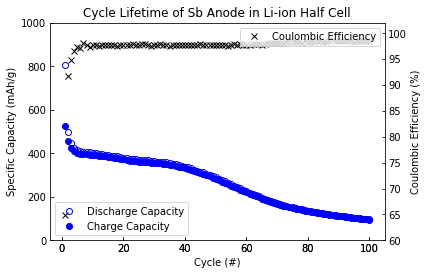

In [16]:
cycle_data = pd.read_excel('Arbin_Cycling_Data.xlsx',  
        sheetname=-1,                         
        parse_cols='A,F,G',    #these columns change depending on which Arbin the data originated
        names=['cycle','charge','discharge'])      


mass = 0.00092            #mass of active material in grams
                          #"1000" is the conversion factor from Ah to mAh

cycle_fig = figure()

capacity = cycle_fig.add_subplot(111)     
capacity.plot(cycle_data['cycle'],cycle_data['discharge']/mass*1000,'bo',markerfacecolor="none", label='Discharge Capacity')
capacity.plot(cycle_data['cycle'],cycle_data['charge']/mass*1000,'bo',label='Charge Capacity')
capacity.set_xlabel('Cycle (#)')
capacity.set_ylabel('Specific Capacity (mAh/g)')
capacity.set_xlim(0,100)
capacity.set_ylim(0,1000)
plt.legend(loc="lower left")
capacity.tick_params(axis="y",direction="in")
capacity.tick_params(axis="x",direction="in")

CE = cycle_fig.add_subplot(111, sharex=capacity, frameon=False)    
CE.plot(cycle_data['cycle'],
        (cycle_data['charge']/cycle_data['discharge'])*100,'kx', label='Coulombic Efficiency')
CE.yaxis.tick_right()
CE.yaxis.set_label_position("right")
CE.set_ylabel('Coulombic Efficiency (%)',color='k')   
CE.set_ylim(60,102)
CE.tick_params(axis="x",direction="in")
CE.tick_params(axis="y",direction="in")

plt.title('Cycle Lifetime of Sb Anode in Li-ion Half Cell')
plt.legend(loc='upper right')
plt.show()